<a href="https://colab.research.google.com/github/clairewangqc/Java/blob/main/nlp_classification_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
%matplotlib inline

# ML model imports
from sklearn.linear_model import LogisticRegression # Logistic regression
from sklearn.naive_bayes import MultinomialNB # NAIVE BAYES
from sklearn.ensemble import RandomForestClassifier # Random forests

# Standard evaluation and splitting tools
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

# Text processing
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize, WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
import re 
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
data = pd.read_csv('https://raw.githubusercontent.com/cjflanagan/cs68/master/Womens%20Clothing%20E-Commerce%20Reviews%20-%20Womens%20Clothing%20E-Commerce%20Reviews.csv')
data.head()

,Age,Title,Review Text,Recommended IND,Division Name,Department Name,Class Name
0,33,NaN,Absolutely wonderful - silky and sexy and comf...,1,Initmates,Intimate,Intimates
1,34,NaN,Love this dress! it's sooo pretty. i happene...,1,General,Dresses,Dresses
2,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",1,General Petite,Bottoms,Pants
4,47,Flattering shirt,This shirt is very flattering to all due to th...,1,General,Tops,Blouses


In [23]:
data.columns

Index(['Age', 'Title', 'Review Text', 'Recommended IND', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [24]:
data["Recommended IND"].value_counts()

1    19314
0     4172
Name: Recommended IND, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


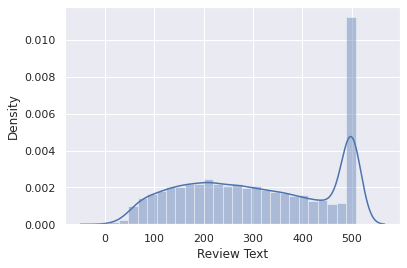

In [25]:
## Length of the Text using KDEplot
length = data["Review Text"].str.len()
sns.distplot(length)
plt.show()

In [26]:
## Checking for stopwords
stopwordSet = set(stopwords.words("english"))

In [27]:
lemma = WordNetLemmatizer()

In [28]:
# Takes a text and will remove everything that are not alphabet

def cleanup_sentances(sentence):
    text = re.sub('[^a-zA-Z]'," ", sentence) # Removing non a-z characters
    print(sentence) # Print out non-cleaned text
    text = text.lower() # Lowering all text
    text = word_tokenize(text, language="english") # Splitting each word into an element of a list
    text = [lemma.lemmatize(word) for word in text if(word) not in stopwordSet] # Lemmatizing words and removing stopwords
    text = " ".join(text) # Putting words back into a single string. ['the', 'brown', 'cow'] --> 'the brown cow'
    print(text, '\n') # Print out cleaned text
    return text

In [29]:
data['Review Text'].replace('', np.nan, inplace=True)
data.dropna(subset=['Review Text'], inplace=True)
data['text_cleaned'] = data['Review Text'].apply(cleanup_sentances)
data.head()

Streaming output truncated to the last 5000 lines.
Nothing wrong with the dress, sadly it's the body i'm putting it on that's less than perfect. fits fine and tts, but just doesn't do anything for my bit wide hips, other than adds to them. hangs nicely, but jersey top and nylon bottom add to the wide hip issue. that said, i think i may still keep it as its a great length (not too short) and a nice, simple dress. really versatile.
nothing wrong dress sadly body putting le perfect fit fine tt anything bit wide hip add hang nicely jersey top nylon bottom add wide hip issue said think may still keep great length short nice simple dress really versatile 

I'm petite and pear shaped so i'm small on top and curvy around the hips and love the way this dress fits. it's a relaxed fit so it's not super fitted and it's loose around the waist which is great. it's a wonderful casual dress to wear with a pair of tall boots. i adore it!
petite pear shaped small top curvy around hip love way dress fit 

,Age,Title,Review Text,Recommended IND,Division Name,Department Name,Class Name,text_cleaned
0,33,NaN,Absolutely wonderful - silky and sexy and comf...,1,Initmates,Intimate,Intimates,absolutely wonderful silky sexy comfortable
1,34,NaN,Love this dress! it's sooo pretty. i happene...,1,General,Dresses,Dresses,love dress sooo pretty happened find store gla...
2,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses,high hope dress really wanted work initially o...
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",1,General Petite,Bottoms,Pants,love love love jumpsuit fun flirty fabulous ev...
4,47,Flattering shirt,This shirt is very flattering to all due to th...,1,General,Tops,Blouses,shirt flattering due adjustable front tie perf...


In [30]:
Recommended_data = data[data["Recommended IND"] == 1]
not_Recommended_data = data[data["Recommended IND"] == 0]
undersampled_Recommended_data = Recommended_data.sample(n=4101, random_state =20)
undersampled_data = undersampled_Recommended_data.append(not_Recommended_data)
undersampled_data["Recommended IND"].value_counts()

1    4101
0    4101
Name: Recommended IND, dtype: int64

In [31]:
undersampled_data.head()

,Age,Title,Review Text,Recommended IND,Division Name,Department Name,Class Name,text_cleaned
4151,37,Love this dress!,Love the bright red color. such a comfortable ...,1,General Petite,Dresses,Dresses,love bright red color comfortable fit still fe...
4700,39,Gorgeous!,This top is gorgeous! the print is lovely and ...,1,General Petite,Tops,Blouses,top gorgeous print lovely material cut well co...
15893,43,Super cute,I bought this tunic is blue. it is now one of ...,1,General Petite,Tops,Blouses,bought tunic blue one favorite top wear skinny...
19577,40,My favorite pants,I love these pants. a dry cleaner lost my favo...,1,General,Bottoms,Pants,love pant dry cleaner lost favorite black pair...
438,63,Really cute!,These jeans are so cute! they are perfect for ...,1,General,Bottoms,Jeans,jean cute perfect petite fit look way younger ...


In [32]:
## Create the (B.O.W) bag of word model
cv = CountVectorizer(max_features = 2000)
X = cv.fit_transform(undersampled_data.text_cleaned).toarray()

In [33]:
pd.DataFrame(X, columns=cv.get_feature_names()).head(10)

,able,absolutely,accent,accentuate,accentuated,accentuates,acceptable,accessory,accommodate,according,accurate,accurately,achieve,across,acrylic,actual,actually,add,added,adding,addition,additional,additionally,adjust,adjustable,adjusting,admit,adorable,adore,advice,aesthetic,afraid,ag,age,ago,agree,agreed,ahead,air,airy,...,working,workmanship,workout,worn,worried,worry,worse,worst,worth,would,woven,wow,wrap,wrapped,wrinkle,wrinkled,wrinkly,wrist,write,wrong,xl,xsmall,xsp,xx,xxsp,yarn,yay,year,yellow,yes,yesterday,yet,yoga,yoke,young,younger,zero,zip,zipped,zipper
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
y= undersampled_data['Recommended IND']

## Split the dataset into Training and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state = 0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train , test_size=0.2, random_state = 0)

In [36]:
## Logistic Regression
model = LogisticRegression() # Instantiating the model 
model.fit(X_train, y_train) # Fitting the model

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
Y_pred = model.predict(X_valid) # producing predictions on the validation dataset

In [38]:
Y_pred.shape

(1313,)

In [39]:
fpr, tpr, thresholds = metrics.roc_curve(y_valid, Y_pred) # Producing false and true positive rates at different thresholds
print('AUC: ', metrics.auc(fpr, tpr))
print(classification_report(y_valid, Y_pred))
print(confusion_matrix(y_valid, Y_pred))

AUC:  0.8381249970938479
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       686
           1       0.81      0.86      0.83       627

    accuracy                           0.84      1313
   macro avg       0.84      0.84      0.84      1313
weighted avg       0.84      0.84      0.84      1313

[[558 128]
 [ 86 541]]


In [40]:
## Random Forest
model = RandomForestClassifier()

In [41]:
model.fit(X_train, y_train)
Y_pred = model.predict(X_valid)
fpr, tpr, thresholds = metrics.roc_curve(y_valid, Y_pred)
print('AUC: ', metrics.auc(fpr, tpr))
print(classification_report(y_valid, Y_pred))

AUC:  0.8497612305345925
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       686
           1       0.84      0.85      0.84       627

    accuracy                           0.85      1313
   macro avg       0.85      0.85      0.85      1313
weighted avg       0.85      0.85      0.85      1313



In [42]:
print(confusion_matrix(y_valid, Y_pred))

[[586 100]
 [ 97 530]]


In [43]:
## Naives baye multinomial
clf = MultinomialNB()
clf.fit(X_train, y_train)
Y_pred = clf.predict(X_valid)

In [44]:
fpr, tpr, thresholds = metrics.roc_curve(y_valid, Y_pred)
print('AUC: ', metrics.auc(fpr, tpr))
print(classification_report(y_valid, Y_pred))
print(confusion_matrix(y_valid, Y_pred))

AUC:  0.8624262418569614
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       686
           1       0.86      0.85      0.86       627

    accuracy                           0.86      1313
   macro avg       0.86      0.86      0.86      1313
weighted avg       0.86      0.86      0.86      1313

[[599  87]
 [ 93 534]]
